### Paul Adams
### DS7337 Natural Language Processing
### Homework Unit 1
### 10 May 2020

In [6]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
import pandas as pd
import numpy as np

print(tf.__version__)

2.0.0


In [378]:
tf.random.set_seed(13)

# Regression Model
## Load Data

In [7]:
diabetes = datasets.load_diabetes()

In [156]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [157]:
diabetes['data'].shape

(442, 10)

In [158]:
x = pd.DataFrame(diabetes['data'])

In [159]:
x.columns=diabetes['feature_names']

In [160]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
y = diabetes['target']

## Scale Data

Neural Networks are especially sensitive do data scaling. Nearly all the activation functions saturate at (0,1) or (-1,1)

In [163]:
from sklearn.preprocessing import MinMaxScaler # scale the values to exist between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[9], scaler.min_[9]))
multiplied_by = scaler.scale_[9]
added = scaler.min_[9]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 3.6579246898 and adding 0.503942


In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

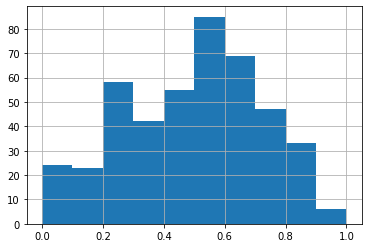

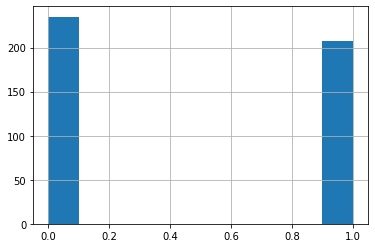

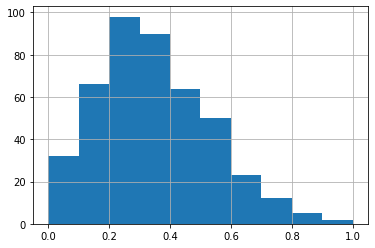

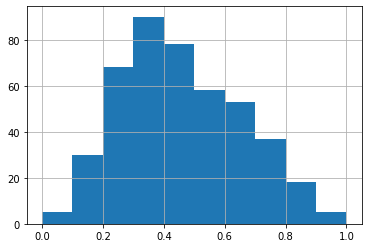

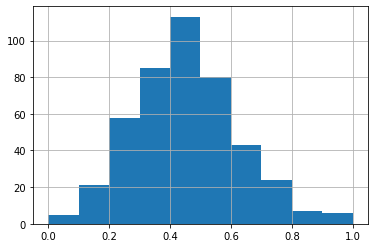

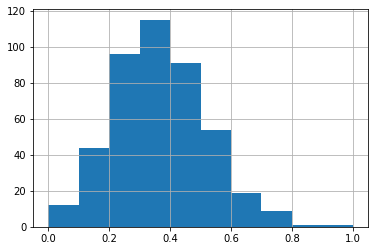

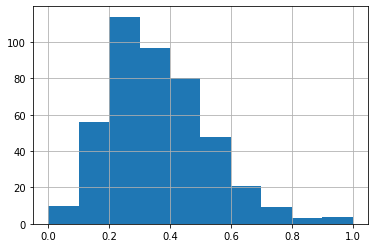

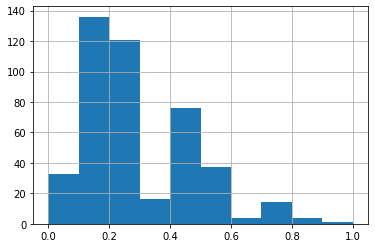

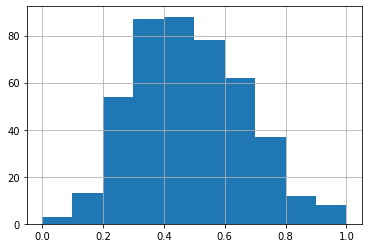

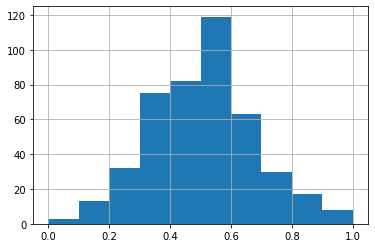

In [165]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Regression Model 
Alright lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in tensorflow.  THey are closely related, but this IS Tensorflow (package), not Keras (package)

In [166]:
x.shape

(442, 10)

In [167]:
y.shape

(442,)

### Logistic Regression for Activiation Function

In [168]:
model = tf.keras.Sequential()
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(1))

## Compile Model
### Optimization

Here, the optimizer selected is Adam, which optimizes by updating the weights, iteratively, during the training process, until the ideal weight is discovered. This functions similarly to stochastic gradient descent, but is faster because it requires less memory. Since there is a large dimension of data, I selected Adam over SGD. I did this for both regression and classification - although they are different datasets, both are large enough to benefit from this.

In [169]:
model.compile(optimizer='adam', # Stochastic Gradiant Descent is slow and gets the same results as adam so use adam instead
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

## Fit model
Now it is time to train

In [188]:
from datetime import datetime
from keras.callbacks import TensorBoard
from tensorflow import keras
from time import time
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

#tb = TensorBoard(log_dir=f"log_regression\\{time()}")
es = EarlyStopping(min_delta=0,patience=10) 
logdir = "log_regression/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir);

## How did you know when you were done training?
I knew the model was done training when subsequent epochs failed to continue reducing the loss.

Holding batch size constant at 32, 100 epochs produced a loss of 6,888. 1,000 epochs produced a loss 2,850. 5,000 epochs produced 2,681. However, after plotting the training and validation curves in tensorboard, the decrease in loss flattened around epoch 730. Therefore, that's where the training should be halted to prevent over-fitting the data.

In [189]:
z = model.fit(scaled_train_df.values, y, epochs=5000, batch_size=32, verbose=0, callbacks=[tensorboard_callback]) # You want a reasonable batch size, but not too small

In [203]:
print(hist_df[hist_df.loss == hist_df.loss.min()])

             loss  mean_squared_error
4992  2428.466975         2428.467285


In [204]:
print("Average test loss: ", np.average(z.history['loss']))

Average test loss:  2543.3306746279345


## Visualize that data
Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output. Please run the tensorflow command to view the tensorboards generated using the data in the zip folder's log_classification and log_regression directories.

In [205]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

## Validate!!
SO far we have used the entire dataset to train.  We know that Prof Slater frowns upon this.  In Neural Networks, ratter than a cross validation, a validation split is done.  Lets repeat the experiment with 20% splits


In [206]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

In [207]:
model_final = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(1))

In [208]:
model_final.compile(optimizer=tf.optimizers.Adam(0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
out = model_final.fit(x_train.values, y_train, validation_data=(x_test.values,y_test), epochs=5000, batch_size=32,callbacks=[tensorboard_callback,es], verbose=0)

### Regression Model Histogram Plot of Weights

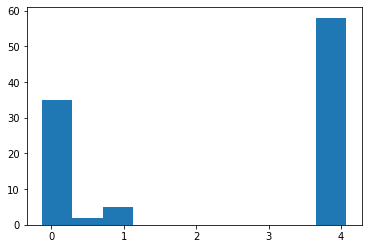

In [408]:
w = model_final.get_weights()
plt.hist(w[4]);

In [385]:
out_history = pd.DataFrame(out.history)

In [386]:
print(out_history[out_history.loss == out_history.loss.min()])

           loss  mean_squared_error     val_loss  val_mean_squared_error
745  2872.52244         2872.522461  3577.870079             3577.870117


In [387]:
print("Average test loss: ", np.average(out.history['loss']))

Average test loss:  7085.160467233977


In [226]:
logdir = "logs_regression/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir);

In [2]:
%load_ext tensorboard
%tensorboard --logdir log_regression

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6012 (pid 29756), started 0:00:02 ago. (Use '!kill 29756' to kill it.)

# Classification Model
There are 10 target classes to be predicted using the digits dataset. The output layer has been set to 10.

In [113]:
model_digits = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:

model_digits.add(layers.Dense(1000, activation='sigmoid')) # hidden layer 1
model_digits.add(layers.Dense(100, activation='sigmoid')) # hidden layer 2
model_digits.add(layers.Dense(10,activation='sigmoid'),) # output layer - one node for each target value (in this case, the target can be 0-9 so 10 outputs)

model_digits.compile(optimizer=tf.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), # You want sparsecategorical if your data is integer (like one-hot encoded classes)
              metrics=['accuracy'])

In [114]:
digits = datasets.load_digits()
x = pd.DataFrame(digits['data'])
digits['target']
y = digits['target']

In [116]:
x= digits['data']
y = digits['target']
# Why do I not have to scale? -- Because this is a classification model built on bayesian probability?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=1776)

In [ ]:
z2 = model_digits.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=5000, batch_size=16, callbacks=[tb,es,tensorboard_callback], verbose=0)

### Classification Model Histogram Plot of Weights

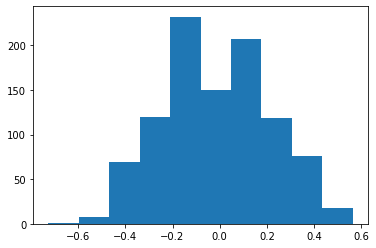

In [392]:
w = model_digits.get_weights()
plt.hist(w[1]);

In [135]:
z2_history = pd.DataFrame(z2.history)

In [136]:
print(z2_history[z2_history.loss == z2_history.loss.min()])

       loss  accuracy  val_loss  val_accuracy
6  0.115654   0.96882   0.26071      0.923248


In [137]:
print("Average test loss: ", np.average(z2.history['loss']))

Average test loss:  0.27512591918833723


In [141]:
logdir = "log_classification/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir);

## How did you know when you were done training?
### Validation curves and stopping point

Based on the tensorboard graphs for model loss and accuracy below, the ideal stopping point is at 6 epochs. At this point, accuracy is at its highest and epcoh loss it as its lowest.

In [4]:
%load_ext tensorboard
%tensorboard --logdir log_classification

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6013 (pid 29782), started 0:00:02 ago. (Use '!kill 29782' to kill it.)

# Scraping Billboard Hot 100

In [ ]:
######################################################
######################################################
######################################################
######################################################
################### This one works ###################
######################################################
######################################################
######################################################
######################################################
# Scraping the Billboard Hot 100

In [19]:
def get_top100(url):
    import urllib.request
    from bs4 import BeautifulSoup
    import pandas as pd
    
    page=urllib.request.Request(url,headers={'User-Agent': 'Mozilla/5.0'}) 
    infile=urllib.request.urlopen(page).read()
    data = infile.decode('ISO-8859-1')
    soup = BeautifulSoup(data, 'html.parser')

    rank = {'class': 'chart-element__rank__number'}
    songs = {'class': 'chart-element__information__song text--truncate color--primary'}
    artists = {'class': 'chart-element__information__artist text--truncate color--secondary'}
    divs = soup.findAll(attrs=songs) + soup.findAll(attrs=rank) + soup.findAll(attrs=artists)
    
    all_songs = pd.Series(divs[0:100])
    all_ranks = pd.Series(divs[100:200])
    all_artists = pd.Series(divs[200:300])
    frame = [all_ranks, all_songs, all_artists]
    billboard_df = pd.concat(frame, axis=1)
    billboard_df.columns = ['Rank','Song','Artist']
    pd.set_option('max_colwidth', 400)
    pd.options.display.max_rows = 100
    return billboard_df;

In [20]:
url = "https://www.billboard.com/charts/hot-100"
get_top100(url)

,Rank,Song,Artist
0,[1],[THE SCOTTS],"[THE SCOTTS, Travis Scott & Kid Cudi]"
1,[2],[Blinding Lights],[The Weeknd]
2,[3],[Toosie Slide],[Drake]
3,[4],[Savage],[Megan Thee Stallion]
4,[5],[The Box],[Roddy Ricch]
5,[6],[Say So],[Doja Cat]
6,[7],[Don't Start Now],[Dua Lipa]
7,[8],[Circles],[Post Malone]
8,[9],[Intentions],[Justin Bieber Featuring Quavo]
9,[10],[Adore You],[Harry Styles]


In [ ]:
# End of Scraping Billboard Hot 100
######################################################
######################################################
######################################################
######################################################
######################################################